# Análisis univariado y multivariado

Se usarán las siguientes variables para el análisis:
* **FECHA_INICIO_ACTIVIDADES:** Muestra el inicio de actividades del contribuyente, para el análisis se pueden establecer periodos (presidenciales, municipales, etc) y obtener una relación entre aquel y la cantidad de nuevos negocios.
* **FECHA_SUSPENSION_DEFINITIVA:** Fechas en las que un negocio dejó de operar. El análisis de esta variable nos ayudará a determinar en qué periodo temporal desaparecieron negocios, con lo que podremos analizar las medidas económicas tomadas por las instituciones alrededor de aquel periodo
* **ACTIVIDAD_ECONOMICA:** Define el tipo de actividad que el contribuyente ejerce. Con esta variable podemos generar grupos y poder profundizar el análisis
* **NUMERO_ESTABLECIMIENTO:** Define la cantidad de sucursales que el contribuyente tiene. Junto con la variable 


In [1]:
import csv  # library csv
import pandas as pd  # library pandas
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
FILE_NAME = 'GUAYAQUIL.csv'

In [2]:
guayaquil = pd.read_csv(FILE_NAME, sep=',', encoding='utf-8', error_bad_lines=False, index_col=0)  # reading GUAYAQUIL file

In [10]:
guayaquil.columns

Index(['NUMERO_RUC', 'RAZON_SOCIAL', 'NOMBRE_COMERCIAL',
       'ESTADO_CONTRIBUYENTE', 'CLASE_CONTRIBUYENTE',
       'FECHA_INICIO_ACTIVIDADES', 'FECHA_ACTUALIZACION',
       'FECHA_SUSPENSION_DEFINITIVA', 'FECHA_REINICIO_ACTIVIDADES', 'OBLIGADO',
       'TIPO_CONTRIBUYENTE', 'NUMERO_ESTABLECIMIENTO',
       'NOMBRE_FANTASIA_COMERCIAL', 'CALLE', 'NUMERO', 'INTERSECCION',
       'ESTADO_ESTABLECIMIENTO', 'DESCRIPCION_PROVINCIA', 'DESCRIPCION_CANTON',
       'DESCRIPCION_PARROQUIA', 'CODIGO_CIIU', 'ACTIVIDAD_ECONOMICA'],
      dtype='object')

In [11]:
df = guayaquil.dropna(subset=['FECHA_INICIO_ACTIVIDADES'])

In [12]:
df.head()

,NUMERO_RUC,RAZON_SOCIAL,NOMBRE_COMERCIAL,ESTADO_CONTRIBUYENTE,CLASE_CONTRIBUYENTE,FECHA_INICIO_ACTIVIDADES,FECHA_ACTUALIZACION,FECHA_SUSPENSION_DEFINITIVA,FECHA_REINICIO_ACTIVIDADES,OBLIGADO,...,NOMBRE_FANTASIA_COMERCIAL,CALLE,NUMERO,INTERSECCION,ESTADO_ESTABLECIMIENTO,DESCRIPCION_PROVINCIA,DESCRIPCION_CANTON,DESCRIPCION_PARROQUIA,CODIGO_CIIU,ACTIVIDAD_ECONOMICA
1,100092519001,BAYANCELA GONZALEZ HUGO ENRIQUE,NaN,PASIVO,OTROS,20/11/1973,29/05/2008,29/09/2009,NaN,N,...,NaN,BOLIVIA,1300,NaN,CER,GUAYAS,GUAYAQUIL,GARCIA MORENO,Q862001,CONSULTA Y TRATAMIENTO POR MÉDICOS GENERALES Y...
2,100121268001,LUCERO VELEZ MANUEL SALVADOR,NaN,SUSPENDIDO,OTROS,30/04/1998,09/07/2009,31/08/2011,NaN,N,...,NaN,29 AVA.,4805,CALLE O - CALLE P,CER,GUAYAS,GUAYAQUIL,FEBRES CORDERO,H492101,TRANSPORTE TERRESTRE DE PASAJEROS POR SISTEMAS...
3,100122753001,AGUILERA TORAL MIGUEL PATRICIO,NaN,ACTIVO,OTROS,28/06/1985,17/07/2017,NaN,NaN,S,...,ELECTRONICA LOS ANDES,AV EL BOMBERO,S/N,S/N,CER,GUAYAS,GUAYAQUIL,TARQUI,G469000,VENTA AL POR MAYOR DE DIVERSOS PRODUCTOS SIN E...
4,100122753001,AGUILERA TORAL MIGUEL PATRICIO,NaN,ACTIVO,OTROS,28/06/1985,17/07/2017,NaN,NaN,S,...,ELECTRONICA LOS ANDES,AV BENJAMIN CARRION,S/N,TERCERA,CER,GUAYAS,GUAYAQUIL,TARQUI,G469000,VENTA AL POR MAYOR DE DIVERSOS PRODUCTOS SIN E...
5,100122753001,AGUILERA TORAL MIGUEL PATRICIO,NaN,ACTIVO,OTROS,28/06/1985,17/07/2017,NaN,NaN,S,...,ELECTRONICA LOS ANDES,AV CARLOS JULIO AROSEMENA,S/N,S/N,CER,GUAYAS,GUAYAQUIL,TARQUI,G469000,VENTA AL POR MAYOR DE DIVERSOS PRODUCTOS SIN E...


In [13]:
df['FECHA_INICIO_ACTIVIDADES'] = pd.to_datetime(df['FECHA_INICIO_ACTIVIDADES'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Discretizando los datos - Nuevos contribuyentes
Creamos una columna `PRESIDENTE` que determina el presidente durante el periodo de tiempo en que han registrado nuevos contribuyentes

In [40]:
mahuad_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(1998,8,10)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2000,1,22))].assign(PRESIDENTE='JM')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [20]:
guti_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2003,1,5)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2005,4,20))].assign(PRESIDENTE='LG')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [37]:
pala_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2005,4,20)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2007,1,15))].assign(PRESIDENTE='AP')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [34]:
rc1_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2007,1,15)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2009,8,10))].assign(PRESIDENTE='RC1')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [25]:
rc2_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2009,8,10)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2013,5,24))].assign(PRESIDENTE='RC2')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [27]:
rc3_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2013,5,24)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2017,5,24))].assign(PRESIDENTE='RC3')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [28]:
lenin_per_ini = df[df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2017,5,24)].assign(PRESIDENTE='LM')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [29]:
lenin_per_ini.head()

,NUMERO_RUC,RAZON_SOCIAL,NOMBRE_COMERCIAL,ESTADO_CONTRIBUYENTE,CLASE_CONTRIBUYENTE,FECHA_INICIO_ACTIVIDADES,FECHA_ACTUALIZACION,FECHA_SUSPENSION_DEFINITIVA,FECHA_REINICIO_ACTIVIDADES,OBLIGADO,...,CALLE,NUMERO,INTERSECCION,ESTADO_ESTABLECIMIENTO,DESCRIPCION_PROVINCIA,DESCRIPCION_CANTON,DESCRIPCION_PARROQUIA,CODIGO_CIIU,ACTIVIDAD_ECONOMICA,PRESIDENTE
458318,919268458001,RODRIGUEZ ZAMBRANO RUDDY BEATRIZ,NaN,SUSPENDIDO,OTROS,2017-12-06,NaN,21/11/2017,NaN,N,...,NaN,SOLAR 01,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,S960907,"ACTIVIDADES DE LIMPIABOTAS (BETUNEROS), PORTEA...",LM
458319,919375790001,BORJA CASTRO CARLOS ALBERTO,NaN,SUSPENDIDO,OTROS,2017-12-06,NaN,31/07/2018,NaN,N,...,AV. FRANCISCO DE ORELLANA,S/N,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,C181104,"ACTIVIDADES DE IMPRESIÓN DE PÓSTERS, GIGANTOGR...",LM
458563,919433268001,ADRIAN BAJAÑA JAVIER HUMBERTO,NaN,SUSPENDIDO,OTROS,2017-12-06,NaN,27/08/2018,NaN,N,...,NaN,SOLAR 15,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,S952201,REPARACIÓN Y MANTENIMIENTO DE APARATOS DE USO ...,LM
458564,919442624001,OLGUIN CORTEZ RAUL JAVIER,MIS TIERNOS DELFINES,SUSPENDIDO,OTROS,2017-12-06,12/06/2017,26/08/2018,NaN,N,...,NaN,SOLAR 11,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,I561001,"RESTAURANTES, CEVICHERÍAS, PICANTERÍAS, CAFETE...",LM
470381,101868404001,BERNAL ANDRADE SALVADOR ELIAS,NaN,ACTIVO,RISE,2018-01-23,10/09/2018,NaN,10/09/2018,N,...,CALLE 29 AVA,2209,MARACAIBO ENTRE A GONZALEZ,ABI,GUAYAS,GUAYAQUIL,FEBRES CORDERO,G477111,VENTA AL POR MENOR DE PRENDAS DE VESTIR Y PELE...,LM


In [41]:
cdf = pd.concat([mahuad_per_ini, guti_per_ini, pala_per_ini, rc1_per_ini, rc2_per_ini, rc3_per_ini, lenin_per_ini])

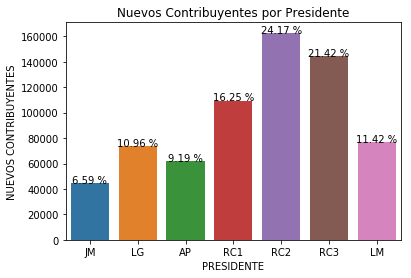

In [46]:
ax = sns.countplot(x='PRESIDENTE', data=cdf)
ax.set(ylabel='NUEVOS CONTRIBUYENTES', title='Nuevos Contribuyentes por Presidente')
total = float(len(cdf))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format((height/total) * 100),
            ha="center") 


In [47]:
df2 = guayaquil.dropna(subset=['FECHA_SUSPENSION_DEFINITIVA'])

In [48]:
df2

,NUMERO_RUC,RAZON_SOCIAL,NOMBRE_COMERCIAL,ESTADO_CONTRIBUYENTE,CLASE_CONTRIBUYENTE,FECHA_INICIO_ACTIVIDADES,FECHA_ACTUALIZACION,FECHA_SUSPENSION_DEFINITIVA,FECHA_REINICIO_ACTIVIDADES,OBLIGADO,...,NOMBRE_FANTASIA_COMERCIAL,CALLE,NUMERO,INTERSECCION,ESTADO_ESTABLECIMIENTO,DESCRIPCION_PROVINCIA,DESCRIPCION_CANTON,DESCRIPCION_PARROQUIA,CODIGO_CIIU,ACTIVIDAD_ECONOMICA
1,100092519001,BAYANCELA GONZALEZ HUGO ENRIQUE,NaN,PASIVO,OTROS,20/11/1973,29/05/2008,29/09/2009,NaN,N,...,NaN,BOLIVIA,1300,NaN,CER,GUAYAS,GUAYAQUIL,GARCIA MORENO,Q862001,CONSULTA Y TRATAMIENTO POR MÉDICOS GENERALES Y...
2,100121268001,LUCERO VELEZ MANUEL SALVADOR,NaN,SUSPENDIDO,OTROS,30/04/1998,09/07/2009,31/08/2011,NaN,N,...,NaN,29 AVA.,4805,CALLE O - CALLE P,CER,GUAYAS,GUAYAQUIL,FEBRES CORDERO,H492101,TRANSPORTE TERRESTRE DE PASAJEROS POR SISTEMAS...
9,100160480001,PEÑAFIEL DIAZ LUIS RODRIGO,NaN,SUSPENDIDO,OTROS,17/08/1995,04/02/2015,09/09/2018,04/02/2015,N,...,NaN,NaN,SOLAR 21,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,L682002,"INTERMEDIACIÓN EN LA COMPRA, VENTA Y ALQUILER ..."
11,100194281001,ARIZAGA MOREIRA EDGAR REMIGIO,NaN,SUSPENDIDO,OTROS,01/06/1999,13/06/2001,13/09/2006,NaN,N,...,NaN,NaN,SL. 6,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,G471101,VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCT...
12,100169242001,OCHOA LEON EMMA LUCIA,NaN,SUSPENDIDO,OTROS,19/04/1997,07/12/2001,13/07/2010,NaN,N,...,NaN,VENEZUELA,3716,12 AVA,CER,GUAYAS,GUAYAQUIL,FEBRES CORDERO,G471101,VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCT...
13,100171081001,CARRION LUIS ANTONIO,ALMACEN ROLANDO N 1,PASIVO,OTROS,07/08/1972,13/08/1999,30/12/1978,01/01/1981,N,...,ALMACEN ROLANDO 2,LORENZO DE GARAYCOA,1817,PEDRO PABLO GOMEZ,CER,GUAYAS,GUAYAQUIL,ROCAFUERTE,G477205,"VENTA AL POR MENOR DE PERFUMES, ARTÍCULOS COSM..."
14,100171081001,CARRION LUIS ANTONIO,ALMACEN ROLANDO N 1,PASIVO,OTROS,07/08/1972,13/08/1999,30/12/1978,01/01/1981,N,...,ALMACEN ROLANDO N 1,LORENZO DE GARAICOA,1509,SUCRE,CER,GUAYAS,GUAYAQUIL,ROCAFUERTE,G477205,"VENTA AL POR MENOR DE PERFUMES, ARTÍCULOS COSM..."
15,100205392001,ORELLANA CORREA LUCAS AUGUSTO,NaN,SUSPENDIDO,OTROS,02/04/1972,04/10/2011,18/11/2011,04/10/2011,S,...,ORELLANA CORREA LUCAS AUGUSTO,JOSE DE ANTEPARA,1912,NaN,CER,GUAYAS,GUAYAQUIL,SUCRE,A016309,OTRAS ACTIVIDADES DE POSCOSECHA: DESMOTADO DE ...
16,100205392001,ORELLANA CORREA LUCAS AUGUSTO,NaN,SUSPENDIDO,OTROS,02/04/1972,04/10/2011,18/11/2011,04/10/2011,S,...,NaN,NaN,SOLAR 5,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,A016309,OTRAS ACTIVIDADES DE POSCOSECHA: DESMOTADO DE ...
17,100266030001,NUÑEZ DEL ARCO ANDRADE JORGE IVAN RENE,NaN,SUSPENDIDO,OTROS,01/01/1974,20/02/2013,11/07/2017,20/02/2013,N,...,ALEBUHO,NaN,SOLAR 70,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,M749010,"OTRAS ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y..."


In [49]:
df2['FECHA_SUSPENSION_DEFINITIVA'] = pd.to_datetime(df2['FECHA_SUSPENSION_DEFINITIVA'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
mahuad_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(1998,8,10)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2000,1,22))].assign(PRESIDENTE='JM')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [52]:
guti_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2003,1,5)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2005,4,20))].assign(PRESIDENTE='LG')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [57]:
pala_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2005,4,20)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2007,1,15))].assign(PRESIDENTE='AP')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [53]:
rc1_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2007,1,15)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2009,8,10))].assign(PRESIDENTE='RC1')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [54]:
rc2_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2009,8,10)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2013,5,24))].assign(PRESIDENTE='RC2')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [55]:
rc3_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2013,5,24)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2017,5,24))].assign(PRESIDENTE='RC3')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [58]:
lenin_susp = df2[df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2017,5,24)].assign(PRESIDENTE='LM')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [59]:
cdf2 = pd.concat([mahuad_susp, guti_susp, pala_susp, rc1_susp, rc2_susp, rc3_susp, lenin_susp])

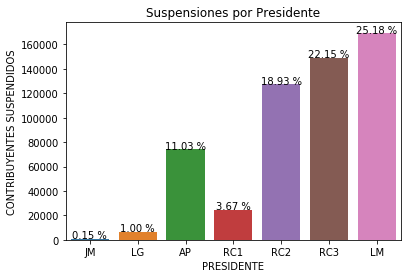

In [60]:
ax = sns.countplot(x='PRESIDENTE', data=cdf2)
ax.set(ylabel='CONTRIBUYENTES SUSPENDIDOS', title='Suspensiones por Presidente')
total = float(len(cdf))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format((height/total) * 100),
            ha="center") 

### Cantidad de establecimientos por tipo de actividad

In [3]:
df3 = guayaquil.dropna(subset=['ACTIVIDAD_ECONOMICA'])

In [15]:
top10 = df3.groupby('ACTIVIDAD_ECONOMICA').size().to_frame('cantidad').sort_values(['cantidad'], ascending=False).reset_index()[:11]
top10['ACTIVIDAD_ECONOMICA'] = top10.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:35], axis=1)

[Text(0,0,'RESTAURANTES, CEVICHERÍAS, PICANTER'),
 Text(0,0,'VENTA AL POR MENOR DE GRAN VARIEDAD'),
 Text(0,0,'INTERMEDIARIOS DEL COMERCIO DE COMB'),
 Text(0,0,'ACTIVIDADES DE LIMPIABOTAS (BETUNER'),
 Text(0,0,'OTRAS ACTIVIDADES PROFESIONALES, CI'),
 Text(0,0,'INTERMEDIACIÓN EN LA COMPRA, VENTA '),
 Text(0,0,'VENTA AL POR MENOR DE GRAN VARIEDAD'),
 Text(0,0,'COMPRA - VENTA, ALQUILER Y EXPLOTAC'),
 Text(0,0,'CONSTRUCCIÓN DE TODO TIPO DE EDIFIC'),
 Text(0,0,'VENTA AL POR MENOR DE PRENDAS DE VE')]

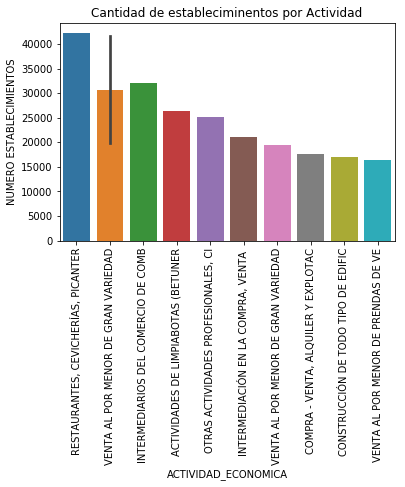

In [24]:
ax = sns.barplot(y='cantidad', x='ACTIVIDAD_ECONOMICA', data=top10)
ax.set(ylabel='NUMERO ESTABLECIMIENTOS', title='Cantidad de estableciminentos por Actividad')
ax.set_xticklabels(labels=top10['ACTIVIDAD_ECONOMICA'],rotation=90)


### Cantidad de contribuyentes por actividad

In [58]:
cont_act = df3[['ACTIVIDAD_ECONOMICA', 'NUMERO_RUC']].groupby(['ACTIVIDAD_ECONOMICA'])

In [60]:
top10_cont = cont_act['NUMERO_RUC'].nunique().to_frame('cantidad').sort_values('cantidad', ascending=False).reset_index()[:11]
top10_cont['ACTIVIDAD_ECONOMICA'] = top10_cont.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:35], axis=1)

In [61]:
top10_cont

,ACTIVIDAD_ECONOMICA,cantidad
0,VENTA AL POR MENOR DE GRAN VARIEDAD,38936
1,"RESTAURANTES, CEVICHERÍAS, PICANTER",37108
2,INTERMEDIARIOS DEL COMERCIO DE COMB,30740
3,ACTIVIDADES DE LIMPIABOTAS (BETUNER,25510
4,"OTRAS ACTIVIDADES PROFESIONALES, CI",23584
5,"COMPRA - VENTA, ALQUILER Y EXPLOTAC",18859
6,"INTERMEDIACIÓN EN LA COMPRA, VENTA",18493
7,VENTA AL POR MENOR DE GRAN VARIEDAD,18171
8,CONSTRUCCIÓN DE TODO TIPO DE EDIFIC,17035
9,"SERVICIOS DE ASESORAMIENTO, ORIENT",15531


[Text(0,0,'VENTA AL POR MENOR DE GRAN VARIEDAD'),
 Text(0,0,'RESTAURANTES, CEVICHERÍAS, PICANTER'),
 Text(0,0,'INTERMEDIARIOS DEL COMERCIO DE COMB'),
 Text(0,0,'ACTIVIDADES DE LIMPIABOTAS (BETUNER'),
 Text(0,0,'OTRAS ACTIVIDADES PROFESIONALES, CI'),
 Text(0,0,'COMPRA - VENTA, ALQUILER Y EXPLOTAC'),
 Text(0,0,'INTERMEDIACIÓN EN LA COMPRA, VENTA '),
 Text(0,0,'VENTA AL POR MENOR DE GRAN VARIEDAD'),
 Text(0,0,'CONSTRUCCIÓN DE TODO TIPO DE EDIFIC'),
 Text(0,0,'SERVICIOS DE  ASESORAMIENTO, ORIENT')]

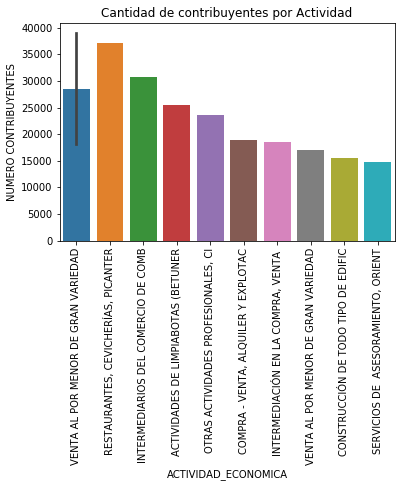

In [63]:
ax = sns.barplot(y='cantidad', x='ACTIVIDAD_ECONOMICA', data=top10_cont)
ax.set(ylabel='NUMERO CONTRIBUYENTES', title='Cantidad de contribuyentes por Actividad')
ax.set_xticklabels(labels=top10_cont['ACTIVIDAD_ECONOMICA'],rotation=90)